### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

### 2. Importing data

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


### 3. Dealing with column Customer

In [3]:
# this column is of no use for analysis purposes and so will be dropped

customer_df = customer_df.drop('Customer', axis = 1)

### 4. Separating numerical from categorical variables

In [4]:
customer_df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
# Effective to Date will also be dropped as even with the correct datatype for its data, it is of no use for analysis purposes

customer_df = customer_df.drop('Effective To Date', axis = 1)

In [6]:
cols = [col.replace(' ', '_').lower() for col in customer_df.columns]
customer_df.columns = cols

In [7]:
numerical_df = customer_df.select_dtypes(include = np.number)
categorical_df = customer_df.select_dtypes(include = np.object)

### 5. Plotting categoricals by target

In [8]:
# checking to see how many subplots must be generated

len(categorical_df.columns)

14

#### Visualisation of data:
- using boxplots

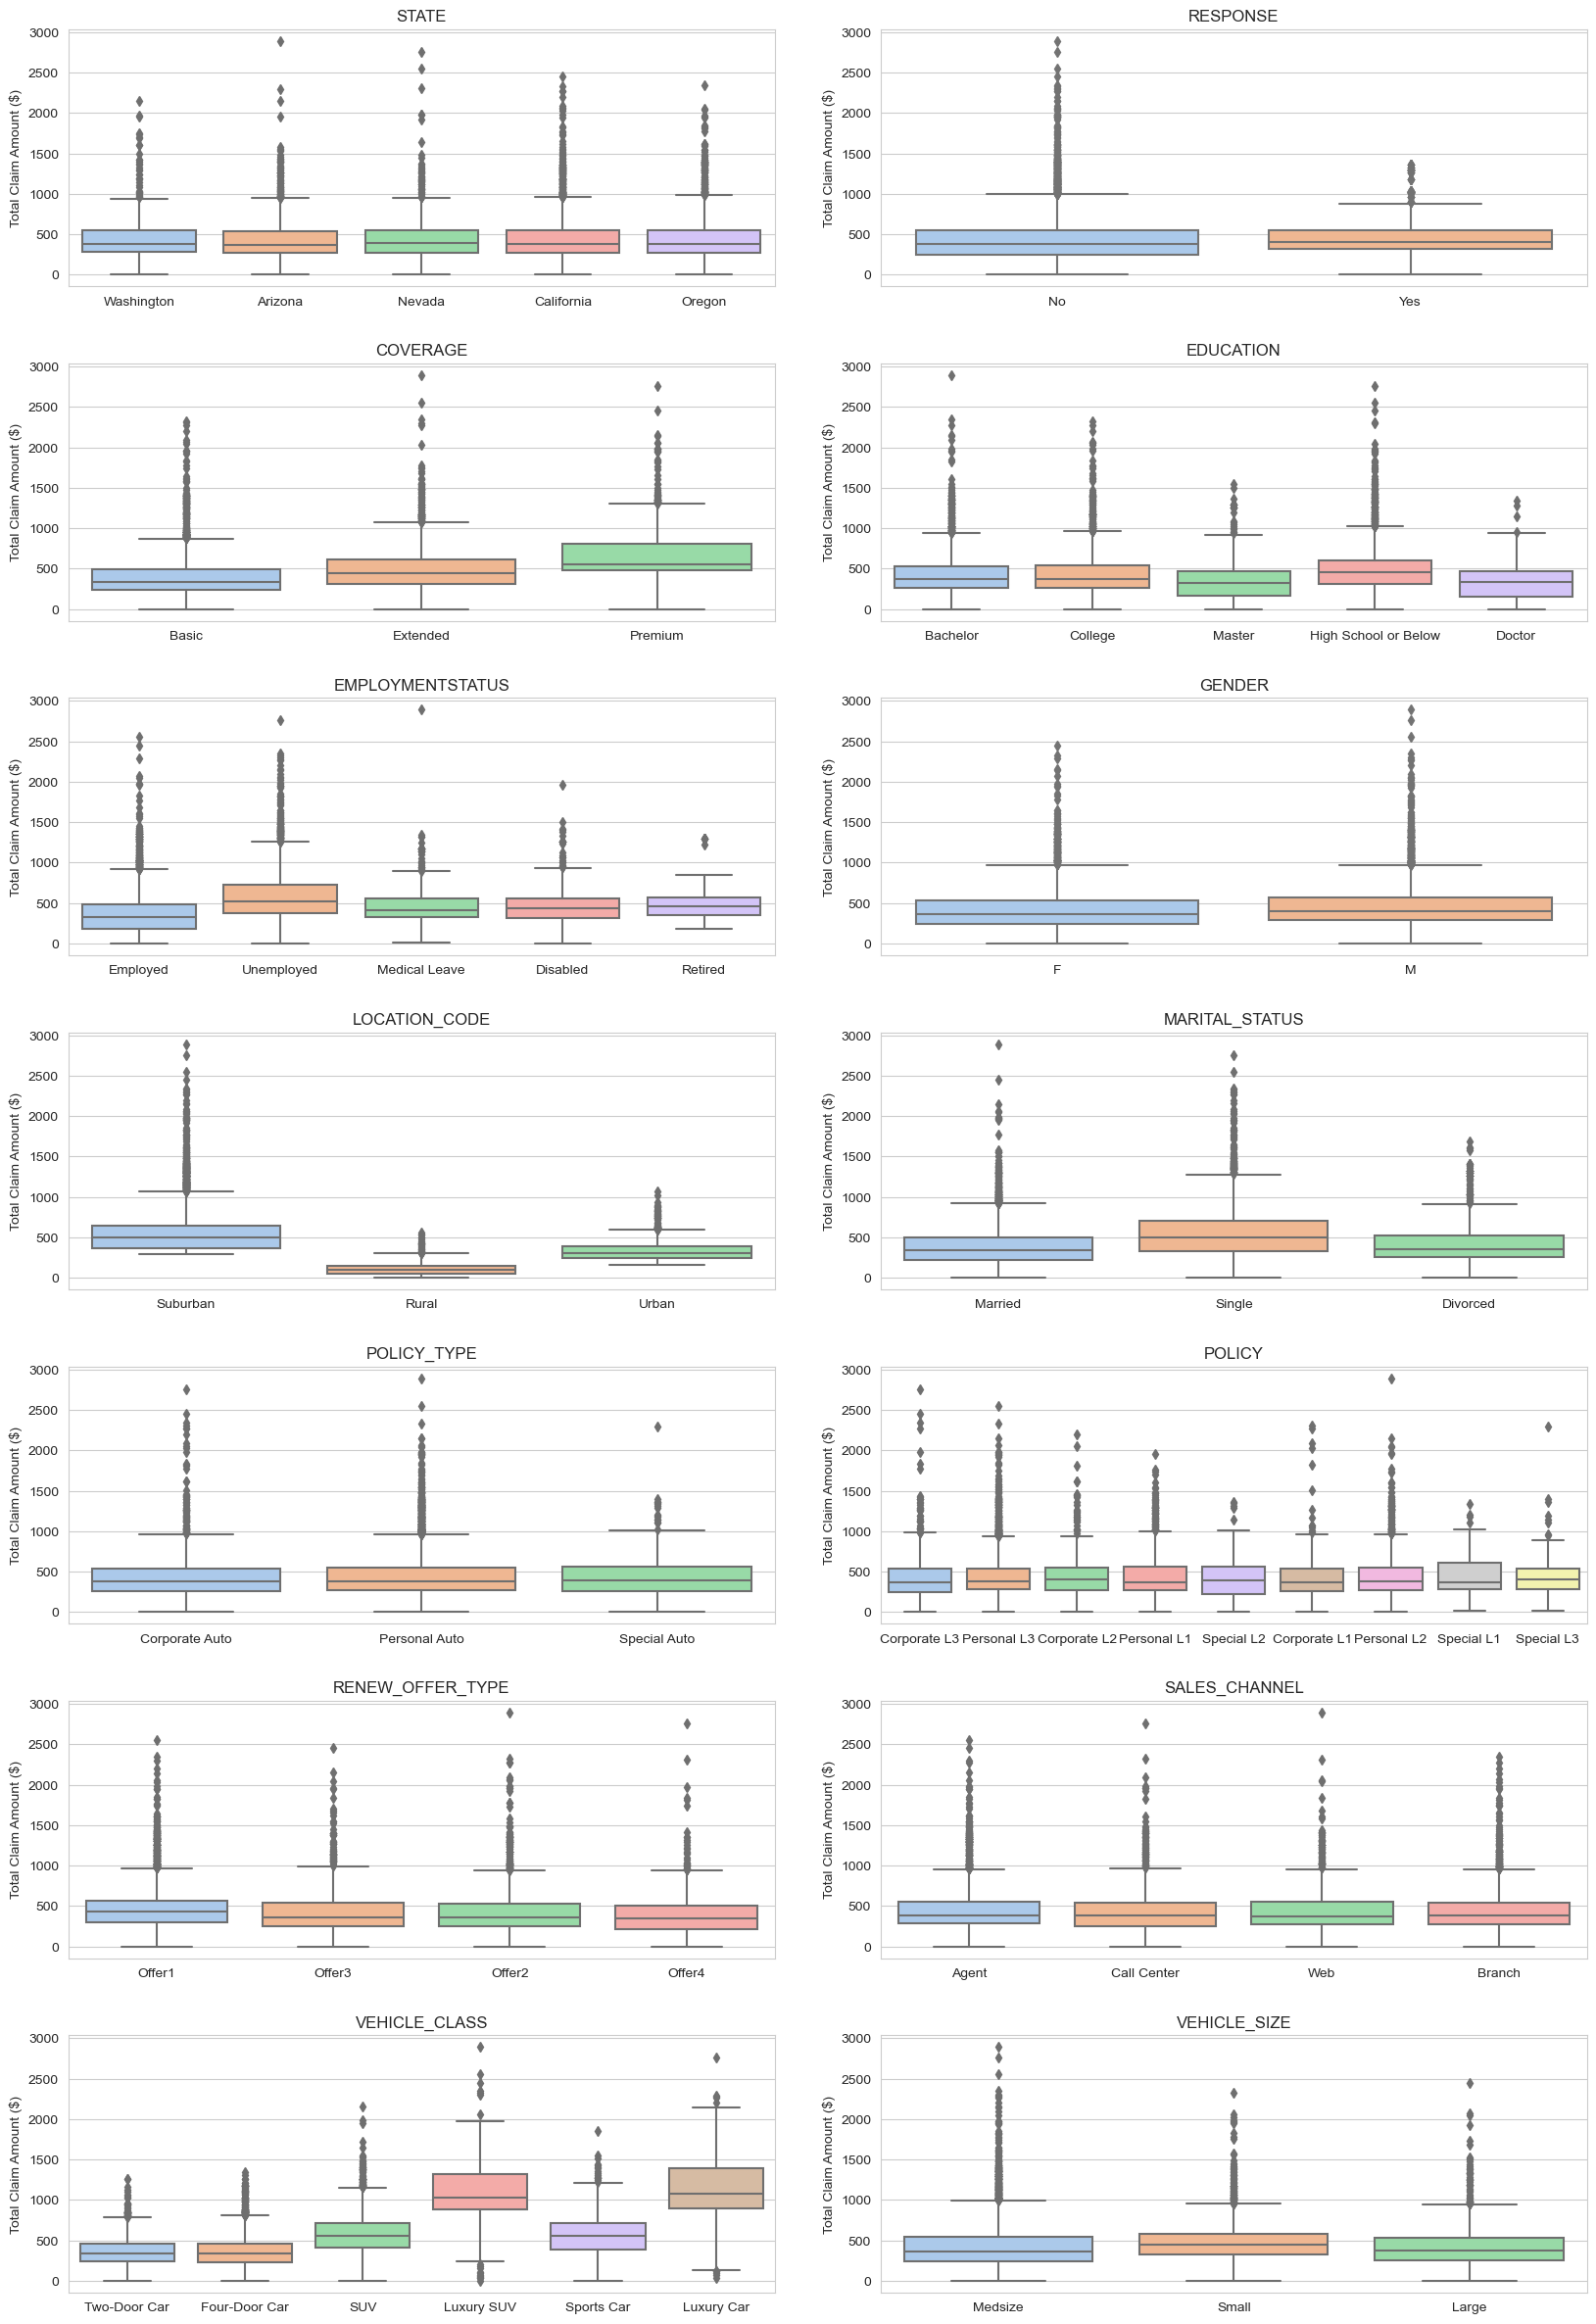

In [9]:
# the target is the variable total_claim_amount

fig, axes = plt.subplots(7,2, figsize = (20,30))
plt.subplots_adjust(wspace = 0.15, hspace=0.3)

for col, ax in zip(categorical_df.columns, axes.flat):
    with sns.color_palette('pastel'):   # assigning different colours from a specific palette to the separate columns. limit of pastel palette: 10 colours
        sns.boxplot(x = categorical_df[col], y = numerical_df['total_claim_amount'], ax = ax).set(xlabel = '', ylabel = 'Total Claim Amount ($)', title = col.upper())
plt.show()

- using barplots

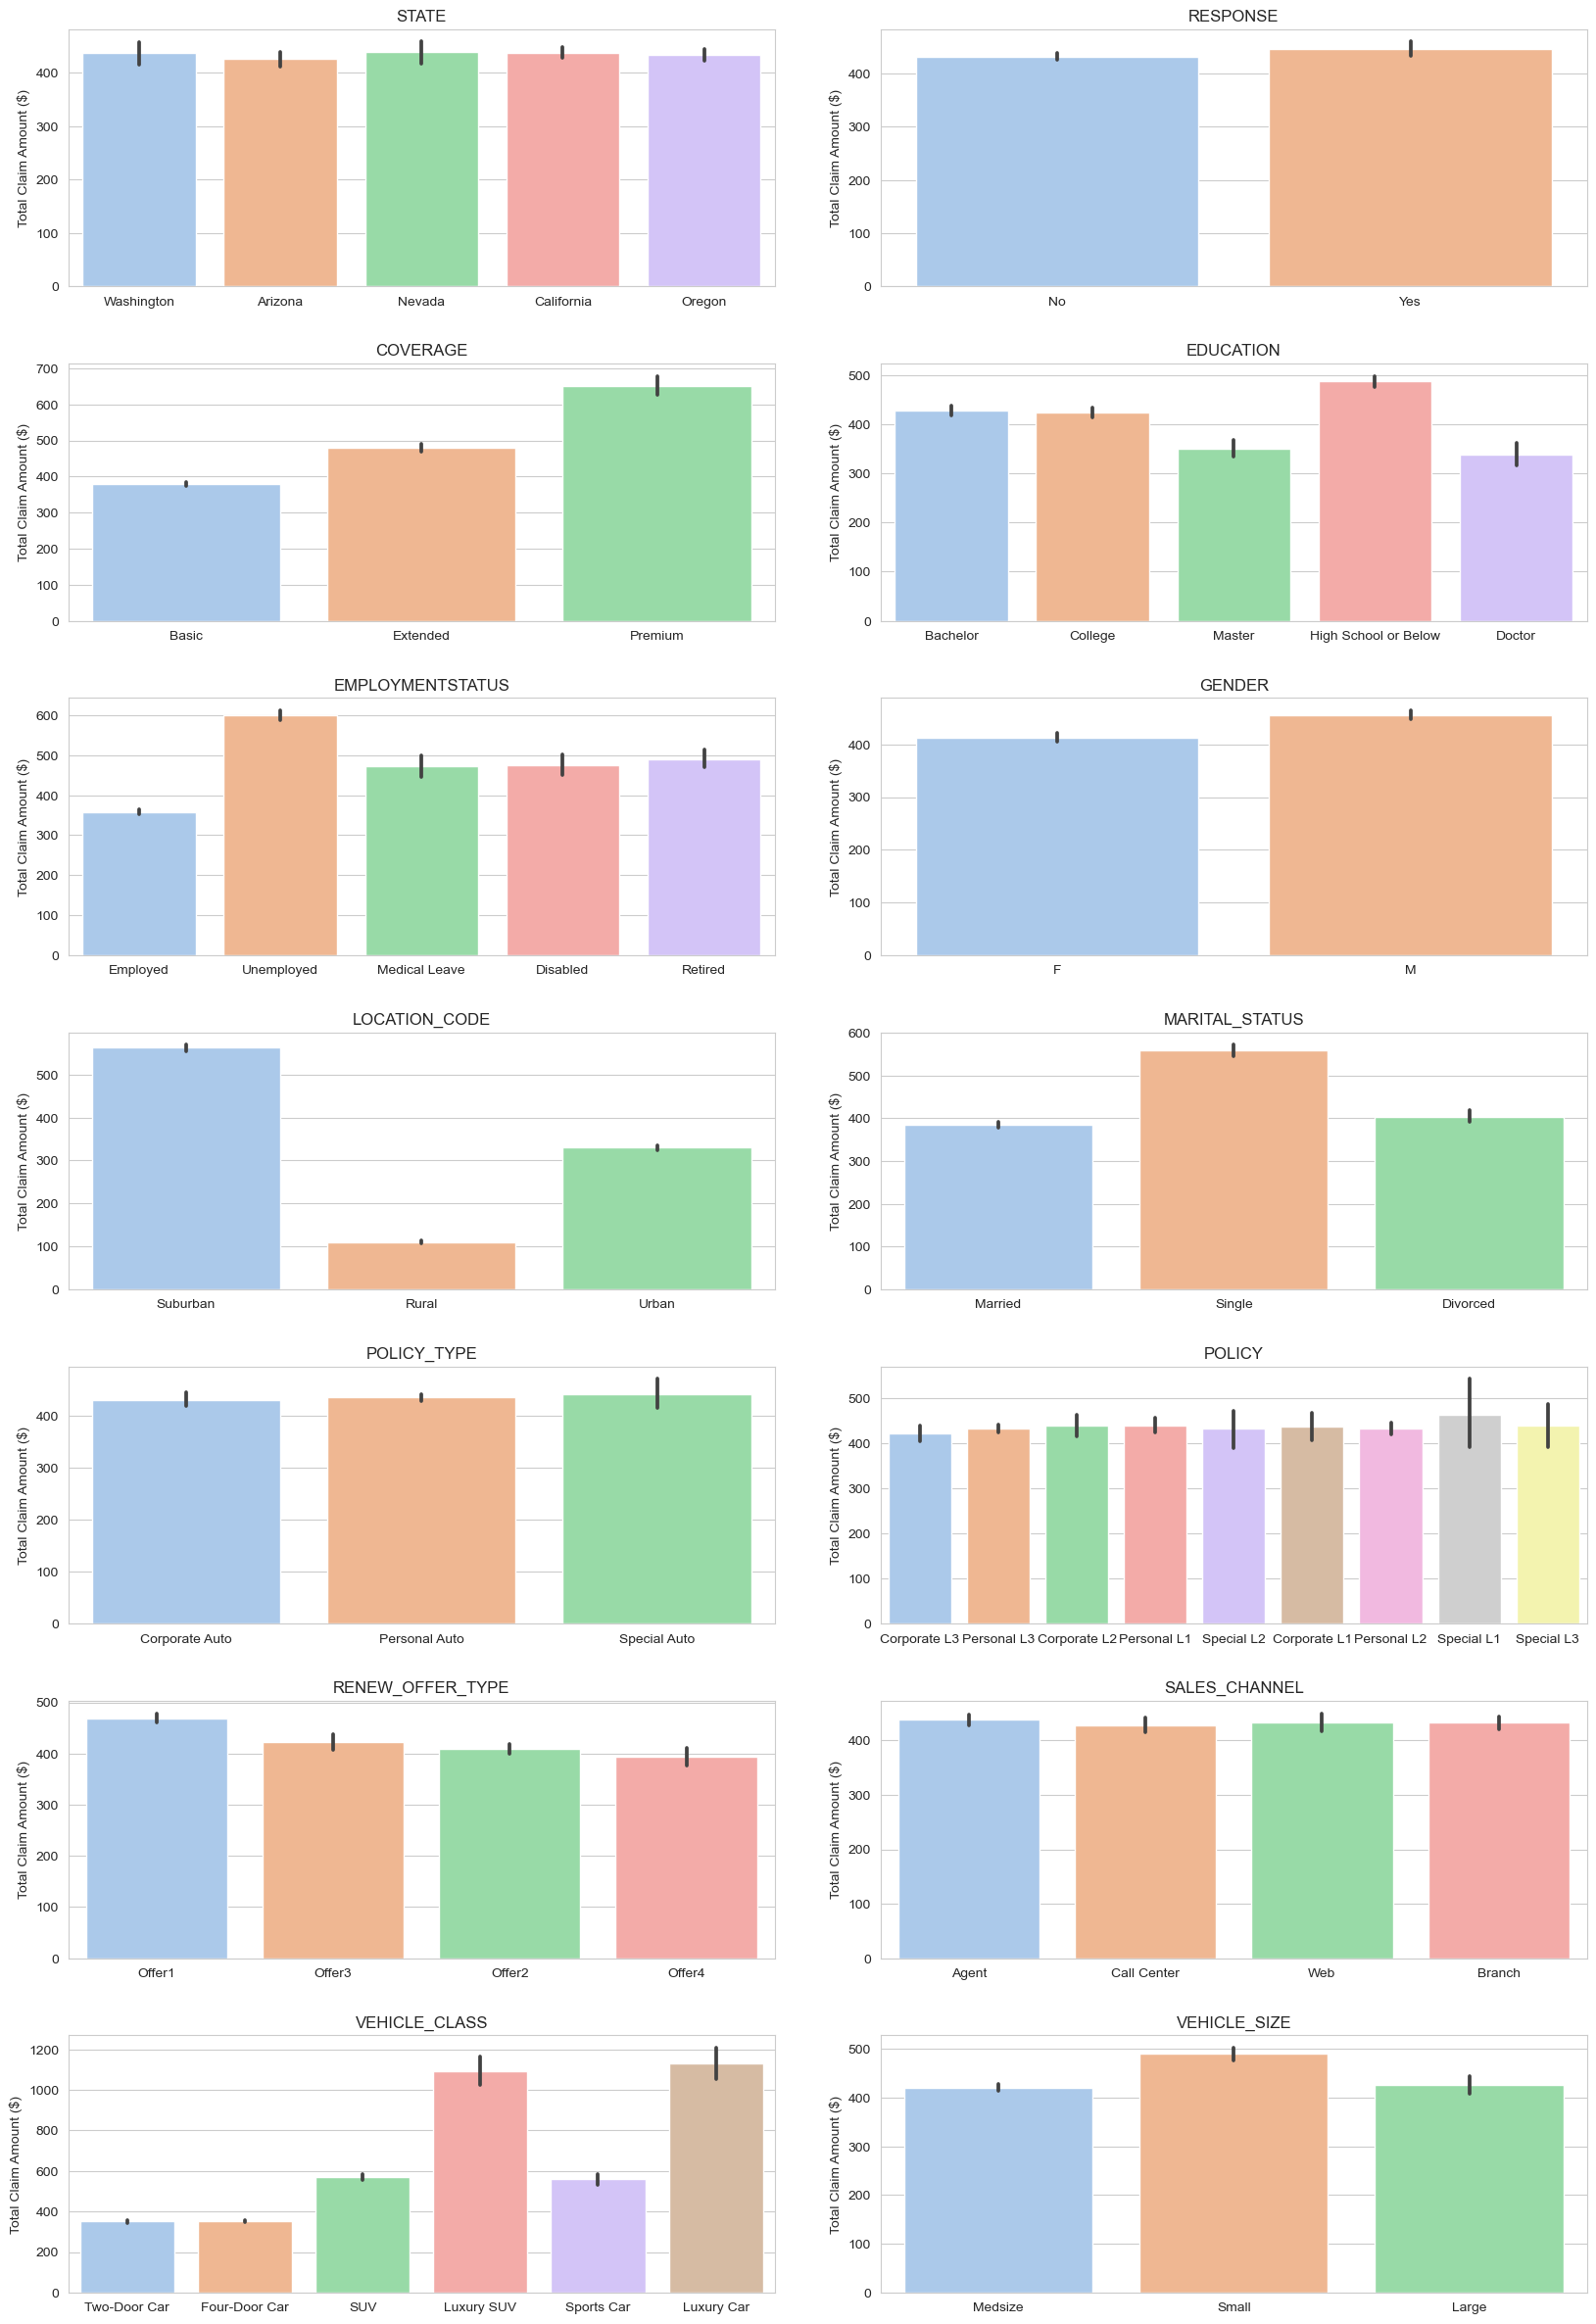

In [10]:
fig, axes = plt.subplots(7,2, figsize = (20,30))
plt.subplots_adjust(wspace = 0.15, hspace=0.3)

for col, ax in zip(categorical_df.columns, axes.flat):
    with sns.color_palette('pastel'):
        sns.barplot(x = categorical_df[col], y = numerical_df['total_claim_amount'], ax = ax).set(xlabel = '', ylabel = 'Total Claim Amount ($)', title = col.upper())
plt.show()

#### *Looking at both the boxplots and barplots, there is not much variation in the case of state and sales_channel. They can be dropped.*

In [11]:
# for an extra opportunity to work on grouping categories in task 6, the code associated with dropping will be written, but not executed
# categorical_df = categorical_df.drop(['state', 'sales_channel'], axis = 1)

### 6. Checking if categoricals need cleaning

In [12]:
#checking for NaNs
categorical_df.isna().sum()

#there are none

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [13]:
# checking for white-spaces
for column in categorical_df.columns:
    s = categorical_df.iloc[:,0]
    print(column, s.str.isspace().sum())

# no white-spaces

state 0
response 0
coverage 0
education 0
employmentstatus 0
gender 0
location_code 0
marital_status 0
policy_type 0
policy 0
renew_offer_type 0
sales_channel 0
vehicle_class 0
vehicle_size 0


In [14]:
#value_counts for each column
for column in categorical_df.columns:
    print(categorical_df[column].value_counts(), "\n")

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Cor

#### Information extracted by value_counts() can be used to either point to NaNs and/or white-spaces or to produce information about the count of records for each category of a feature. In the last case, it is then possible to decide based on the value counts whether a category is underrepresented and if so how to group the last ones together to make up a category that would be comparable to the bigger ones.

In [15]:
# state: states with < 1000 customers in a separate category
## Xisca's solution
vals = pd.DataFrame(categorical_df['state'].value_counts())
vals = vals.reset_index()
vals.columns = ['state', 'counts']
group_states_df = vals[vals['counts']<1000]
group_states = list(group_states_df['state'])
group_states

['Nevada', 'Washington']

In [16]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

categorical_df['state'] = list(map(clean_state, categorical_df['state']))
categorical_df.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
other         1680
Name: state, dtype: int64

In [17]:
# response: only 2 categories
# coverage: only 3 categories, Premium would be other in the abovementioned solution

# education: categories with < 1000 customers in separate category
vals = pd.DataFrame(categorical_df['education'].value_counts())
vals = vals.reset_index()
vals.columns = ['education', 'counts']
group_education_df = vals[vals['counts']<1000]
group_education = list(group_education_df['education'])

def clean_education(x):
    if x in group_education:
        return 'other'
    else:
        return x

categorical_df['education'] = list(map(clean_education, categorical_df['education']))
categorical_df.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
other                   1083
Name: education, dtype: int64

In [18]:
# employmentstatus: same as above
vals = pd.DataFrame(categorical_df['employmentstatus'].value_counts())
vals = vals.reset_index()
vals.columns = ['employmentstatus', 'counts']
group_es_df = vals[vals['counts']<1000]
group_es = list(group_es_df['employmentstatus'])

def clean_es(x):
    if x in group_es:
        return 'other'
    else:
        return x

categorical_df['employmentstatus'] = list(map(clean_es, categorical_df['employmentstatus']))
categorical_df.employmentstatus.value_counts()

Employed      5698
Unemployed    2317
other         1119
Name: employmentstatus, dtype: int64

In [19]:
# gender: only 2 variables
# location_code: only 3 variables, same as with coverage
# marital_status: same as above
# policy_type: same as above

# policy: separate category for < 1000
vals = pd.DataFrame(categorical_df['policy'].value_counts())
vals = vals.reset_index()
vals.columns = ['policy', 'counts']
group_policy_df = vals[vals['counts']<1000]
group_policy = list(group_policy_df['policy'])

def clean_policy(x):
    if x in group_policy:
        return 'other'
    else:
        return x

categorical_df['policy'] = list(map(clean_policy, categorical_df['policy']))
categorical_df.policy.value_counts()

Personal L3     3426
Personal L2     2122
other           1332
Personal L1     1240
Corporate L3    1014
Name: policy, dtype: int64

In [20]:
# renew_offer_type, sales_channel: no need for changes
# vehicle_class: <1000 in separate category

vals = pd.DataFrame(categorical_df['vehicle_class'].value_counts())
vals = vals.reset_index()
vals.columns = ['vehicle_class', 'counts']
group_vc_df = vals[vals['counts']<1000]
group_vc = list(group_vc_df['vehicle_class'])

def clean_vc(x):
    if x in group_vc:
        return 'other'
    else:
        return x

categorical_df['vehicle_class'] = list(map(clean_vc, categorical_df['vehicle_class']))
categorical_df.vehicle_class.value_counts()

# vehicle_size: no need for changes

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
other             831
Name: vehicle_class, dtype: int64